# Using Python on Jupyter

This notebook has information about Python and different functions that could be useful for getting started. We have also included some examples about how the functions could be used.

How to use this document: run the cell that imports the needed libraries at the **part 2** and then move to the part you're looking for. Because of this, different functions are defined multiple times in this document in order to mitigate the need to scroll up and down in the notebook.

If you don't remember how some features work in these notebooks, press the **h**-button when you haven't chosen any cells, and you'll see a list of the shortcuts of Jupyter.

1. [The starting point](#start)
2. [Libraries](#libraries)
3. [Data structures and analysis](#structures)
4. [Basic operations](#operations)
5. [Generating random values](#random)
6. [Plotting figures](#plotting)
7. [Animations](#animations)
8. [Maps and heat maps](#maps)
9. [Common problems](#problems)

<a id="start"></a>
### 1. The starting point

In programming, you can save different values to **variables**, which can then be used or changed later. Different variable types are for example the integer (int), floating point number (float), and a string of characters (string). In Python defining new variables is easy since the type of the variable doesn't have to be defined.

Sometimes the core that runs the code, **kernel**, has a malfunction. This happens from time to time. When it happens, you can click 'Kernel' and 'Restart & Clear Output', when the processes and outputs are wiped from the memory. However, doing this doesn't change the code or text, so it doesn't fix bugs.

<a id="libraries"></a>
### 2. Libraries

Python is a programming language suitable for scientific computing. One of its core principles is the use of different function libraries. These libraries are imported using the **import**-command.

When you take a look at the materials provided in the Open Data project, you'll notice that every GitHub folder has a text file "requirements.txt" that enables for example [MyBinder](www.mybinder.org) to build a workspace for Jupyter. From the file you can see that the most important libraries we're going to use are:

In [1]:
#The most essential libraries:

import pandas as pd   #contains tools for data analysis
import numpy as np   #contains tools for numerical analysis
import matplotlib.pyplot as plt  #contains tools for plotting figures

#Other useful libraries:

import random as rand   #contains functions for generating pseudo-random numbers
from scipy import stats    #contains scientific computing and statistics sisältää tieteellistä laskentaa ja tilastolaskentaa
from scipy.stats import norm    #tools for analyzing normal distribution
import matplotlib.mlab as mlab  #advanced tools for plotting figures

Remember to run the cell above if you want the examples in this notebook to work. The above could also be written without **as**-command, which renames the packages, but it enables us to use short names for the libraries, which becomes handy when we use them a lot. If you want to read more about libraries, click on 'Help' at the top of the page and you'll find links for more precise documentation and formatting instructions.

There are many more libraries in Python and you can search for them when you need them. There are thousands of useful examples and materials on the internet, thanks to Python's large user base. [StackExchange](https://stackexchange.com/) and [StackOverFlow](https://stackoverflow.com/) are great places for searching for answers to your questions.

<a id="structures"></a>
### 3. Data structures and analysis

**In short:**

Reading a csv-file $\rightarrow$ 
``` Python 
name = pd.read_csv('path', formatting arguments)
```  
Reading a table $\rightarrow$ 
``` Python
pd.read_table('path', formatting arguments)
``` 
Getting the first *n* rows of a table $\rightarrow$ 
``` Python
name.head(n)  
``` 
Length $\rightarrow$ 
``` Python
len(name)  
``` 
Shape $\rightarrow$ 
``` Python
name.shape 
``` 
Column $\rightarrow$ 
``` Python
name.column 
name['column'] 
``` 
Specifying an interval $\rightarrow$ 
``` Python
name[(name.column >= lower_limit) & (name.column <= upper_limit)]  
``` 
Searching for text $\rightarrow$ 
``` Python
name['column'].str.contains('string')  
``` 
Add a column $\rightarrow$ 
``` Python
name = name.assign(column = data) 
``` 
Remove columns $\rightarrow$ 
``` Python
name.drop(['column1','column2'...], axis = 1)
``` 


In our exercises the data is often in .csv-form (comma separated values). Data in this form is very easy to read as a table with the use of *pandas* library. *Pandas* transforms the csv-file into a two-dimensional DataFrame. You can find more information about it [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html), where you can also find more information about the different ways you can analyze and process the data.

The easiest ways to read the data are using the functions **pd.read_csv** and **pd.read_table**. If data is nice (separated by comma, headers included, etc.), other operations are usually not needed.

In [3]:
#Read a dataset of particle data into a variable and give it a name:

doublemuons = pd.read_csv('http://opendata.cern.ch/record/545/files/Dimuon_DoubleMu.csv')

As you can see, you can read a table straight from a URL-address to a variable. If you have a file in a folder, you can read it using a file path: **'../folder/file.csv'**.

If the data is in some other text form, you can try the more common **read_table** -command, that understands other tabular texts as well. The most common problem is that the text is separated with something else than comma, such as a tabulator or a semicolon. In that case you can add the argument **sep = 'x'**, where x is the character used as a separator. Another common problem is that the headers of the columns aren't in the first row. In this case we can use the argument **header = n**, where n is the number of the header row. Note: the numbers start at zero unless otherwise spesified.

More information about the possible arguments [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html). 

Below we have an example of a dataset that doesn't have a header row. The set contains observations of the Sun from the year 1992 forward. More information about the meaning of each column can be found [here](http://sidc.oma.be/silso/infosndhem).

In [4]:
#Read the dataset and name it:

sun = pd.read_table('http://sidc.oma.be/silso/INFO/sndhemcsv.php', sep = ';', encoding = "ISO-8859-1")

For clarity, let's see how our data looks like. For this the **name.head(n)**-command works well. It shows the n first rows of the data. By default n = 5, if you have empty parentheses.

In [5]:
doublemuons.head()

,Run,Event,type1,E1,px1,py1,pz1,pt1,eta1,phi1,...,type2,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,165617,74601703,G,9.6987,-9.5104,0.3662,1.8633,9.5175,0.1945,3.1031,...,G,9.7633,7.3277,-1.1524,6.3473,7.4178,0.7756,-0.1560,1,17.4922
1,165617,75100943,G,6.2039,-4.2666,0.4565,-4.4793,4.2910,-0.9121,3.0350,...,G,9.6690,7.2740,-2.8211,-5.7104,7.8019,-0.6786,-0.3700,1,11.5534
2,165617,75587682,G,19.2892,-4.2121,-0.6516,18.8121,4.2622,2.1905,-2.9881,...,G,9.8244,4.3439,-0.4735,8.7985,4.3697,1.4497,-0.1086,1,9.1636
3,165617,75660978,G,7.0427,-6.3268,-0.2685,3.0802,6.3325,0.4690,-3.0992,...,G,5.5857,4.4748,0.8489,-3.2319,4.5546,-0.6605,0.1875,1,12.4774
4,165617,75947690,G,7.2751,0.1030,-5.5331,-4.7212,5.5340,-0.7736,-1.5522,...,G,7.3181,-0.3988,6.9408,2.2825,6.9523,0.3227,1.6282,1,14.3159


In [6]:
sun.head()

,1992,01,01.1,1992.001,186,0,186,14.3,1.0,14.3,19,-1,-1.1,1
0,1992,1,2,1992.004,190,18,172,8.2,2.6,7.8,21,-1,-1,1
1,1992,1,3,1992.007,234,26,208,18.3,6.1,17.2,21,-1,-1,1
2,1992,1,4,1992.010,243,54,189,14.8,7.0,13.0,20,-1,-1,1
3,1992,1,5,1992.012,242,58,184,13.8,6.8,12.0,18,-1,-1,1
4,1992,1,6,1992.015,245,79,166,18.7,10.6,15.4,14,-1,-1,1


From the above we can see that the first real row of the **sun**-variable is used as a header. This is unfortunate because 1) now the headers are misleading and 2) We won't be able to use the data from the first row in our analysis. Let's solve the problem by using **header = -1**, a row that doesn't exist, as the header argument.

Ylläolevista nähdään, että **aurinko**-muuttujan ensimmäinen oikea rivi on kaapattu otsikoiksi, mikä on sikäli ikävää että 1) nyt otsikot ovat hämääviä ja 2) meiltä jää yhden rivin verran dataa käsittelemättä jos haluamme vaikkapa kuvaajan taulukon jostain sarakkeesta. Ratkaistaan asia laittamalla dataa ladattaessa otsikointiargumentiksi **header = -1**, eli rivi jota ei ole olemassa, jolloin kone tuottaa siihen järjestyslukurivin.

In [7]:
sun = pd.read_table('http://sidc.oma.be/silso/INFO/sndhemcsv.php', sep = ';', encoding = "ISO-8859-1", header = None)
sun.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1992,1,1,1992.001,186,0,186,14.3,1.0,14.3,19,-1,-1,1
1,1992,1,2,1992.004,190,18,172,8.2,2.6,7.8,21,-1,-1,1
2,1992,1,3,1992.007,234,26,208,18.3,6.1,17.2,21,-1,-1,1
3,1992,1,4,1992.010,243,54,189,14.8,7.0,13.0,20,-1,-1,1
4,1992,1,5,1992.012,242,58,184,13.8,6.8,12.0,18,-1,-1,1


If we want to change the headers, we can of course name the columns using the argument **names = ['name1','name2','name3']**

In [11]:
sun = pd.read_table('http://sidc.oma.be/silso/INFO/sndhemcsv.php', sep=';', encoding = "ISO-8859-1", header = None, 
names = ['Year','Month','Day','Fraction','$P_{tot}$','$P_{poh}$','$P_{et}$','$\sigma_{tot}$','$\sigma_{poh}$',
         '$\sigma_{et}$','$N_{tot}$','$N_{poh}$','$N_{et}$','Prov'])
sun.head()

,Year,Month,Day,Fraction,$P_{tot}$,$P_{poh}$,$P_{et}$,$\sigma_{tot}$,$\sigma_{poh}$,$\sigma_{et}$,$N_{tot}$,$N_{poh}$,$N_{et}$,Prov
0,1992,1,1,1992.001,186,0,186,14.3,1.0,14.3,19,-1,-1,1
1,1992,1,2,1992.004,190,18,172,8.2,2.6,7.8,21,-1,-1,1
2,1992,1,3,1992.007,234,26,208,18.3,6.1,17.2,21,-1,-1,1
3,1992,1,4,1992.010,243,54,189,14.8,7.0,13.0,20,-1,-1,1
4,1992,1,5,1992.012,242,58,184,13.8,6.8,12.0,18,-1,-1,1


Among the **name.heads()** command there are some other small commands that are useful when studying the shape of the data. **len(name)** tells us the amount of rows, while **name.shape** tells us the amount of rows and columns.

In [14]:
#Usually the output of a code cell shows only the latest given function. We can output multiple values with the print()-command .
#You can try out what happens if you remove the print()-command.

print (len(sun))
print (sun.shape)

(11170, 14)

Now that data has been imported in a sufficient form, we can start editing it for our own purposes. Usually we are interested in a specific variable within the data, so we must be able to choose specific columns from the original data and choose only the rows in which a certain variable's values is within some bounds.

A column can be chosen by writing **name.column** or **name['column']**. Square brackets are necessary in cases where the name of the column starts with a number, which the machine may interpret as a an ordinal number. If you want to make your life easier and you don't care about the other columns, it is useful to save the column into a variable with **newName = name.column*. 

In [15]:
# Save the column that contains the invariant masses in our muon data. The column is named as 'M'.

iMasses = doublemuons.M
iMasses.head()

0    17.4922
1    11.5534
2     9.1636
3    12.4774
4    14.3159
Name: M, dtype: float64

Selecting rows happens similarly by creating a new variable that contains the elements in the original data that meet the given criteria. For example, choosing an interval would be 
``` Python
newName = name[(name.column >= lower_limit) & (name.column <= upper_limit)]
```
The condition can be any other logical element, such as a certain number or a piece of text in non-numerical data.

In [ ]:
# Let's choose the rows in the particle data where the energy of both particles is more than or equal to 30 GeV.
over30 = doublemuons[(doublemuons.E1 >= 30) & (doublemuons.E2 >= 30)]
over30.head()

In [ ]:
print (len(over30))
print (len(doublemuons))

If we want multiple columns without choosing specific rows, we can write
``` python
newVariable = oldVariable[['column1', 'column2', ...]]
```

If we want to search for a piece of text, we can use te **name.loc**-function in the following way:
``` Python
newVariable = oldVariable.loc[oldVariable['column'] == 'piece_of_text']
```

In that case we would have to know what we are exactly looking for. If you want to find some instances that contain a piece of text, we can use the **contains**-function. The command
``` Python
newName= oldName[oldName['column'].str.contains('piece_of_text')]
```
creates a new variable that has the rows that contain the piece of text we are looking for. By default, the function cares about the letter size, but we can change this by writing
``` Python
newName= oldName[oldName['column'].str.contains('piece_of_text', case = False)]
```
Please note that **str.contains()** in itself is a logical operation that returns true or false from a given question. Negation works as well, such as removing all the joint-stock companies from a list of Finnish alcohol manufacturers (these include 'Oy' or 'Oyj' in their name).

In [ ]:
drinks = pd.read_csv('http://avoindata.valvira.fi/alkoholi/alkoholilupa_valmistus.csv', sep = ';', encoding = "ISO-8859-1", na_filter = False)
drinks.head()

In [ ]:
specificManufacturer = drinks[drinks['Nimi].str.contains('Oy') == False]
print (len(drinks))
print (len(specificManufacturer))

If you want to add or remove columns from the data, you can use the functions **name = name.assign(column = data)** and **name.drop(['column1','column2'...], axis = 1)**. In the drop-function setting the **axis** parameter to 1 tells the function to choose the column.

In [ ]:
# Removing a column with the drop-function.

drinks = drinks.drop(['Nimi'], axis = 1)
drinks.head()

In [ ]:
# Adding a column with the assign-method.
# Let's add a column R that contains numbers.
# The column can contain numbers, text, etc. Just make sure that the column has the right size.

numbers = np.linspace(0, 100, len(drinks))
 
drinks = drinks.assign(R = numbers)
drinks.head()


<a id="operations"></a>
### 4. Basic operations

**In short:**

Absolute value $\rightarrow$ 
``` Python
abs(x)  
``` 
Addition $\rightarrow$ 
``` python
x + y 
``` 
Subtraction $\rightarrow$
```  python
x - y  
``` 
Division $\rightarrow$
```  python
x/y  
``` 
Multiplication $\rightarrow$
``` python
x*y  
``` 
Power $\rightarrow$ 
```  python
x**y  
``` 
Maximum value $\rightarrow$
```  python
max(x)  
``` 
Minimum value $\rightarrow$ 
```  python
min(x)  
``` 
Defining a custom function $\rightarrow$ 
```  python
def name(input):
    operations
    
``` 
Square root $\rightarrow$
```  Python
math.sqrt(x)
``` 
or
```  Python
np.sqrt(x)
``` 

There is nothing extraordinary with the basic operations. If you want the program to print multiple things at once, use the **print()**-function. Text and numbers can also be combined with the help of the **repr(numbers)**-function. It returns a printable version of its input. Python has a large number of built-in functions, which you can find from this [list](https://docs.python.org/3/library/functions.html). Additionally, [here](https://docs.python.org/3/library/stdtypes.html) is some information about the built-in types of Python.

In [2]:
# You can modify the content of the 'number'-variable to try out different operations.

number = 14*2+5/2
text = 'The result: '
print (text + repr(number))

The result: 30.5


In [ ]:
# max() returns the largest item of an iterable.

someNumbers = [3,6,12,67,578,2,5,12,-34]

print('The largest numbers is ' + repr(max(someNumbers)))

More interestingly, you can build your own functions in Python. You **define** the name of the function and its effect by writing
``` Python
def functionName(input):  
    description indented
```

In [3]:
# Let's make a function that halves the number it receives as an input.

def halve(a):
    print(a/2)
    
halve(6)

3.0


In [5]:
# Let's make a function that asks users for integers and calculates the sum of them.

def sum_of_inputs(x,y):
    sum_of_two = x + y
    sentence = '{} + {} equals {}.'.format(x, y, sum_of_two)
    print(sentence)
    
def freeChoice():
    a = int(input("Input an integer: "))
    b = int(input("Input another integer: "))
    sum_of_inputs(a, b)

freeChoice() 

Input an integer: 3
Input another integer: 56
3 + 56 equals 59.


In [8]:
# Let's make a function that returns a given list of radians as degrees of arc. 
# A while-loop goes through the list and performs an operation on each of the elements.

def radsToDegrees(a):
    i=0
    while i < len(a):
        a[i] = a[i]*360/(2*np.pi)
        i+=1
    return a;

radians = [5,2,4,2,1,3]
radiansToDegrees(radians)
print(radians)

[286.4788975654116, 114.59155902616465, 229.1831180523293, 114.59155902616465, 57.29577951308232, 171.88733853924697]


In [10]:
# Or the same with a for-loop:

def radsToDegrees2(a):
    for i in range(0,len(a)):
        a[i] = a[i]*360/(2*np.pi)
    return a;
    
rad = [1,2,3,5,6]
radsToDegrees2(rad)
print(rad)


[57.29577951308232, 114.59155902616465, 171.88733853924697, 286.4788975654116, 343.77467707849394]


<a id="random"></a>
### 5. Generating random values

**In short:**

A random integer $\rightarrow$ 
``` python
rand.randint(lower_limit,upper_limit)
``` 
A random integer between 0 and 1 $\rightarrow$ 
``` python
rand.random()  
``` 
A random collection from a list $\rightarrow$
``` python
rand.choices(list, weights, k = count)  
``` 
A random collection from a population $\rightarrow$ 
``` python
rand.sample(collection, k = count)  
``` 
Normal distribution $\rightarrow$
``` python
rand.normalvariate(mean, standard_deviation)  
``` 
Evenly spaced numbers $\rightarrow$ 
``` python
np.linspace(start, end, num = the number of samples)  
``` 
Evenly spaced numbers $\rightarrow$ 
``` python
np.arange(start, end, stepsize)
``` 


Sometimes it is useful to create simulations or random measurements for the analysis. While the development of advanced [Monte Carlo simulations](https://en.wikipedia.org/wiki/Monte_Carlo_method) is beyond the objectives of this manual, we can take a look at some ways we can produce random numbers. However, it is important to remember that ordinary methods for creating randomness with computers are pseudorandom deterministic processes, and they shouln't be used for high-secrecy and confidential purposes.

In [13]:
# Create a random integer within a wanted interval.

lottery_ticket = rand.randint(1,100)
text = 'The winning ticket of the day is: '
print(text + repr(lottery_ticket))

The winning ticket of the day is: 6


In [ ]:
# Create a random floating point number between 0 and 1 multiplied by 5.

number = rand.random()*5
print(number)

In [16]:
# Remove some arbitrary elements from a list, but make some choices more likely than others.

nameForChildren = ['James', 'Anthony', 'Mary', 'Paul', 'Sara','Linda']
weightedProbs = [10,30,20,50,5,5]

# Define how many names we want, k = wanted. Choices-function can take the same results multiple times.

names= rand.choices(nameForChildren, weights = weightedProbs, k = 3)
print(names)

['Mary', 'Paul', 'Mary']


In [ ]:
# Now without duplicates.

students = ['James', 'Anthony', 'Mary', 'Paul', 'Sara','Linda']
threeVolunteers = rand.sample(students, k = 3)
print(threeVolunteers)

In [ ]:
# A random number from a normal distribution (mean, standard deviation).

number = rand.normalvariate(3,0.1)
print(number)

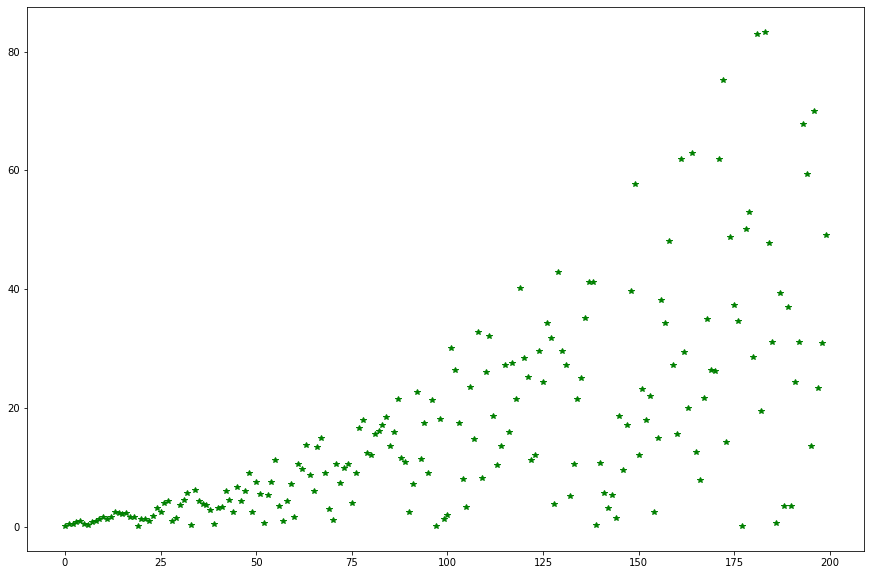

In [6]:
#Let's create an evenly spaced list of numbers between 1 and 10 and randomize it a bit.

listOfNumbers = np.linspace(1, 10, 200)

def randomizer(a):
    b = a.copy()
    
    for i in range(0,len(b)):
        b[i] = b[i]*rand.uniform(0,b[i])
    return b;

result = randomizer(listOfNumbers)
# print(listOfNumbers)
# print(result)

fig = plt.figure(figsize=(15, 10))
plt.plot(result,'g*')
plt.show()

In [3]:
# Another way to produce an evenly spaced array of numbers [a,b[ with the command arange(a,b,c), where c is the stepsize.
# The function may not always work properly if c is not an integer. Note that b is excluded from the array.

# Toinen tapa tuottaa tasaisesti jaettu lukujoukko [a,b[ komennolla arange(a,b,c) missä c on askeleen koko.
# Toiminto voi joskus häröillä jos c ei ole kokonaisluku. Huomaa, että b ei kuulu joukkoon.

numbers = np.arange(1,10,1)
print(numbers)

[1 2 3 4 5 6 7 8 9]


<a id="plotting"></a>
### 6. Plotting figures

**In short:**

Basic plot $\rightarrow$
``` python
plt.plot(name, 'style and colour', properties)
``` 
Scatterplot $\rightarrow$
``` python
plt.scatter(x-data, y-data, marker = 'marker style', color = 'color', properties)
``` 
Histogram $\rightarrow$
``` python
plt.hist(name, bins, range = (start, end), properties)
``` 
Legend $\rightarrow$
``` python
plt.legend(properties)
``` 
Display all open figures $\rightarrow$
``` python
plt.show()
``` 
Fit a normal distribution to the data $\rightarrow$
``` python
(mu, sigma) = norm.fit(name)
``` 
Change the formulation and the name of a figure $\rightarrow$
``` python
plt.xlabel('name for the x-label')
plt.title('title')
fig = plt.figure(figsize=(width, height))

```
Plot the error bars $\rightarrow$
```python
plt.errorbar(value1, value2, xerr = error1, yerr = error2, fmt = 'none')
```


Figures are perhaps the most important reason to use programming in science education. It is easy and effortless to make clear visualizations of large amounts of data. Different use cases require different methods, the most common of which are presented here.

The colours and markers of figures can freely be changed. [Here](https://matplotlib.org/stable/api/markers_api.html) is a list of markers.

In [ ]:
# A basic plot with the plot-function.

numbers = [1,3,54,45,52,34,4,1,2,3,2,4,132,12,12,21,12,12,21,34,2,8]
plt.plot(numbers, 'b*')

# It is a good idea to put plt.show() to the end of plotting. 
# A plot can be seen without it as well, but sometimes it only shows a memory address or some unrecognizable junk. 
# plt.show() fixes this.

plt.show()

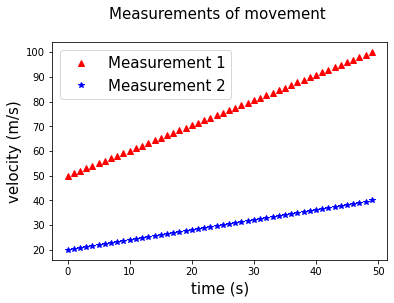

In [11]:
# It is useful to give a figure a name in order to make its purpose clearer.
# Here you can see how different parts of the figure are named.

# Two random datasets:

res1 = np.linspace(10, 20, 50)*rand.randint(2,5)
res2 = np.linspace(10, 20, 50)*rand.randint(2,5)

# Let's plot both of them:

plt.plot(res1, 'r^', label = 'Measurement 1')
plt.plot(res2, 'b*', label = 'Measurement 2')

# Name the axes and the title.

plt.xlabel('time (s)', fontsize = 15)
plt.ylabel('velocity (m/s)', fontsize = 15)
plt.title('Measurements of movement \n', fontsize = 15) # \n creates a new row for formulating the title
          
# Add a legend. If loc-parameter is not specified manually, the legend is automatically placed somewhere where it can fit.

plt.legend(loc='upper left', fontsize = 15)

# Show the plot.

plt.show()

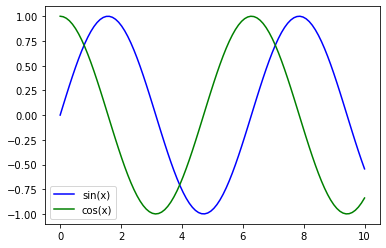

In [7]:
# Other trigonometric functions can be plotted as well.

# The x-axis will be an evenly spaced list of numbers.

x = np.linspace(0, 10, 100)

# Define the functions to be plotted:

y1 = np.sin(x)
y2 = np.cos(x)

# Plot the functions.

plt.plot(x, y1, color = 'b', label = 'sin(x)')
plt.plot(x, y2, color = 'g', label = 'cos(x)')

plt.legend()

plt.show()

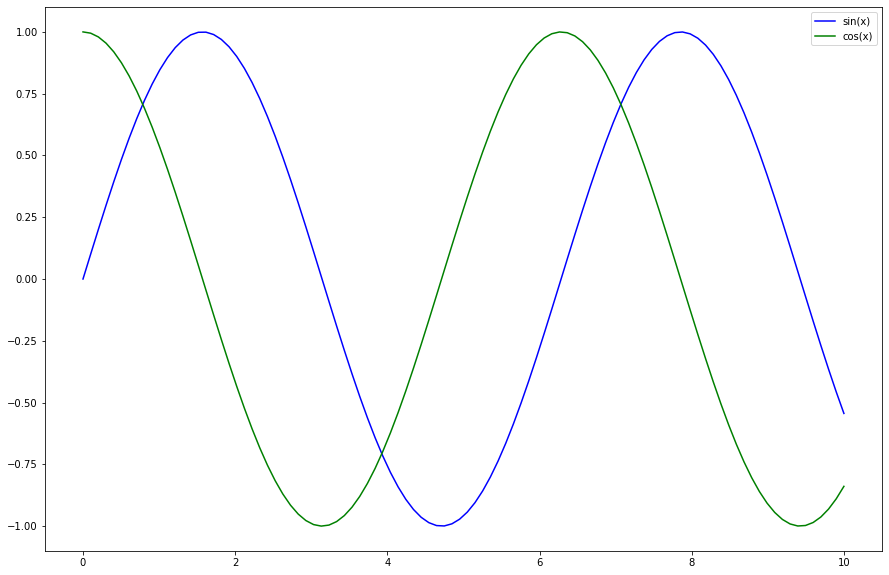

In [12]:
# The default size of a figure in Jupyter is somewhat small. The figsize-parameter helps us to scale images to wanted sizes.
# Let's remake the previous figure.

x = np.linspace(0, 10, 100)

y1 = np.sin(x)
y2 = np.cos(x)

# Here is defined the size of the figure. You can try out different sizes.

fig = plt.figure(figsize=(15, 10))

plt.plot(x, y1, color = 'b', label = 'sin(x)')
plt.plot(x, y2, color = 'g', label = 'cos(x)')

plt.legend()

plt.show()

Another common figure is the [scatterplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html), in which both axes are variables. It is commonly used for example in physics research.

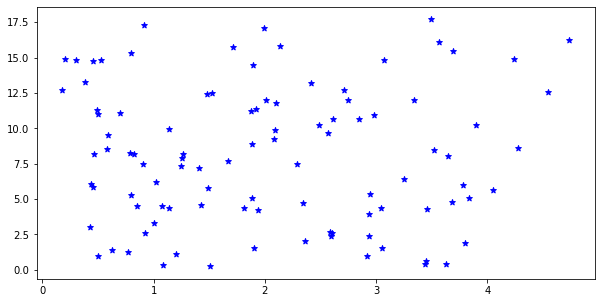

In [14]:
def randomizer(a):
    b = a.copy()
    for i in range(0,len(b)):
        b[i] = b[i]*rand.uniform(0,1)
    return b;

# Take some random data where another variable is spread between 0 to 5 and the other one between 0 to 20.

value1 = randomizer(np.linspace(3,5,100))
value2 = randomizer(np.linspace(10,20,100))

fig = plt.figure(figsize=(10,5))
plt.scatter(value1, value2, marker ='*', color = 'b')
plt.show()

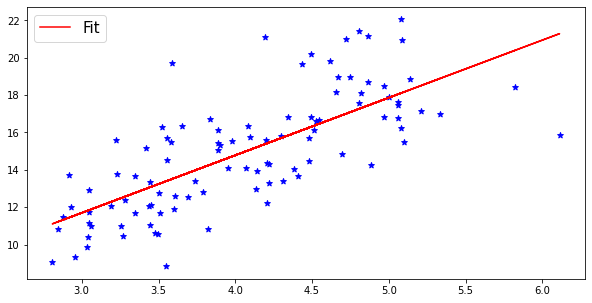

In [22]:
# Another scatterplot example. In this one the values of the variables follow the normal distribution.

def randomize(a):
    b = a.copy()
    for i in range(0,len(b)):
        b[i] = b[i]*rand.normalvariate(1, 0.1)
    return b;

value1 = randomize(np.linspace(3,5,100))
value2 = randomize(np.linspace(10,20,100))

fig = plt.figure(figsize=(10,5))
plt.scatter(value1, value2, marker ='*', color = 'b')

# Let's add a linear fit to the figure using the method of least squares.

slope, intercept, r_value, p_value, std_err = stats.linregress(value1, value2)
plt.plot(value1, intercept + slope*value1, 'r', label='Fit')

plt.legend(fontsize = 15)
plt.show()

# If we wanted to know the mathematical properties of the linear fit, we could for example write print(slope) etc.

# Jos haluaisi tietää suoran matemaattisia arvoja, voisi kirjoittaa esim. print (slope) jne.

Another important type of diagram is the histogram, which lets us to represent graphically the relative frequencies in the data. Histograms are used everywhere from particle physics to medicine and social science.

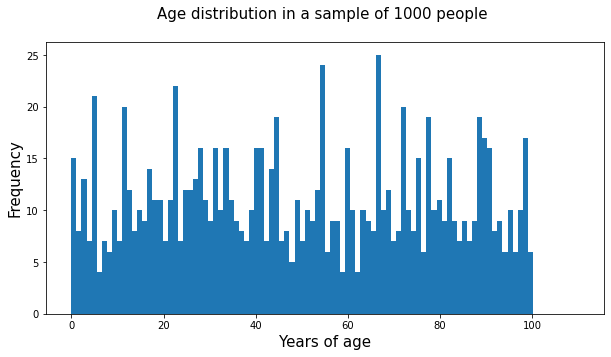

In [25]:
# Let's take a random age distribution and make a histogram of it.

def ageGenerator(a):
    b = a.copy()
    for i in range(0, len(b)):
        b[i] = b[i]*rand.randint(1,100)
    return b;

ages = ageGenerator(np.ones(1000))

fig = plt.figure(figsize = (10,5))
plt.hist(ages, bins = 100, range = (0,110))

plt.xlabel('Years of age', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.title('Age distribution in a sample of %i people \n' %(len(ages)), fontsize = 15 ) 

plt.show()

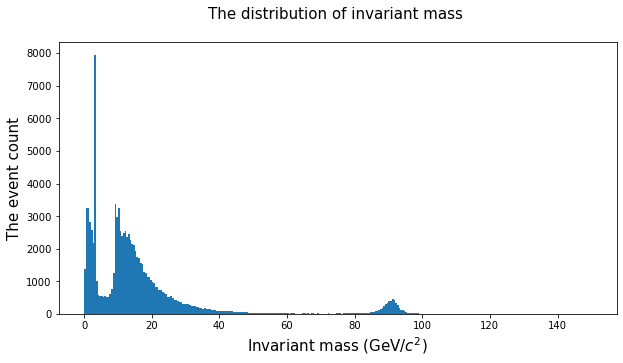

In [27]:
#Let's use some data from a particle physics experiment.

doublemuons = pd.read_csv('http://opendata.cern.ch/record/545/files/Dimuon_DoubleMu.csv')

# Let's make a histogram with respect to the invariant mass, the column M.

fig = plt.figure(figsize = (10,5))
plt.hist(doublemuons.M, bins = 300, range = (0,150))

plt.xlabel('Invariant mass (GeV/$c^2$)', fontsize = 15)
plt.ylabel('The event count', fontsize = 15)
plt.title('The distribution of the invariant mass of two muons \n', fontsize = 15 ) 

plt.show()

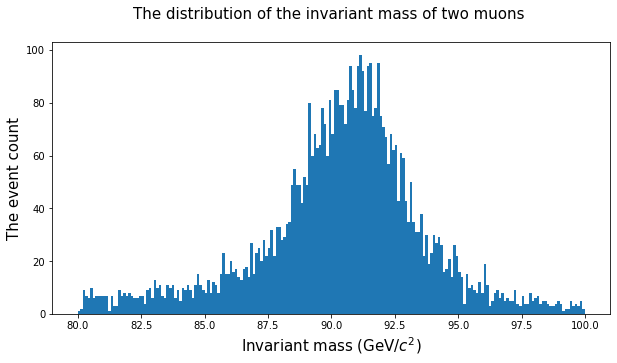

In [28]:
# Let's analyze the area between 80 and 100.

peak = doublemuons[(doublemuons.M >= 80) & (doublemuons.M <= 100)]

fig = plt.figure(figsize = (10,5))
plt.hist(peak.M, bins = 200, range = (80,100))

plt.xlabel('Invariant mass (GeV/$c^2$)', fontsize = 15)
plt.ylabel('The event count', fontsize = 15)
plt.title('The distribution of the invariant mass of two muons \n', fontsize = 15 ) 

plt.show()

On average, fitting nonlinear curves with the data needs a bit more programming. But in the case of distributions Python offers a variety of suitable functions. For example, you can fit a normal distribution to the above figure as follows:

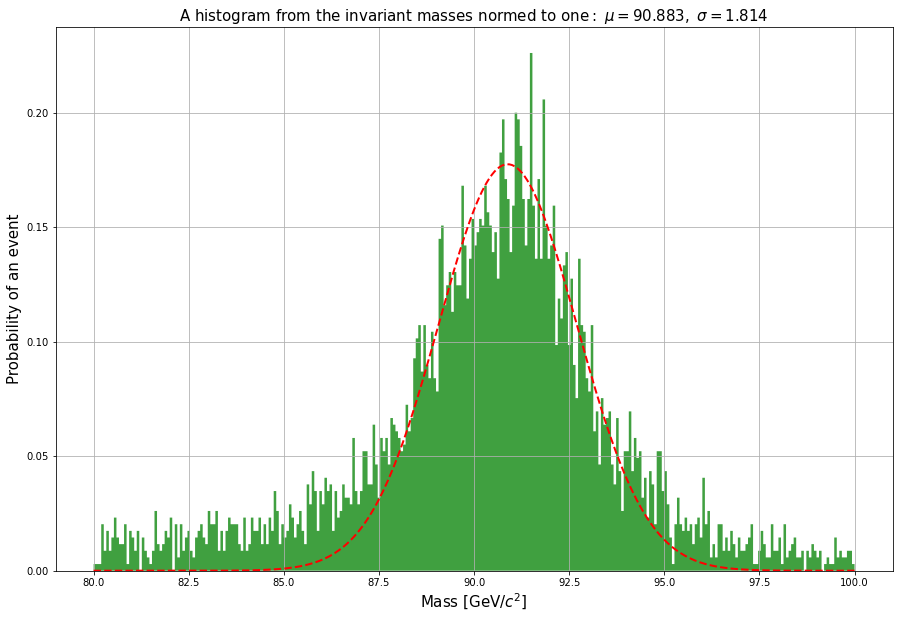

In [36]:
# Let's defined the limits of the fit:

lower_limit = 87
upper_limit = 95

peak = doublemuons[(doublemuons.M > lower_limit) & (doublemuons.M < upper_limit)]

fig = plt.figure(figsize=(15, 10))

# Let's define the limits for the data we're going to plot.

lower = 80
upper = 100

area = doublemuons[(doublemuons.M > lower) & (doublemuons.M < upper)]

# Since the area of the histogram is set to one for the purposes of the cumulative distribution function,
# let's define a coefficient that takes into account the ratio between the analyzed area and the full area when making a fit.

coef = len(peak)/len(area)
(mu, sigma) = norm.fit(peak.M)

# Let's draw a histogram between the limits we set earlier:

n, bins, patches = plt.hist(kaksoismyonit.M, 300, density = 1, facecolor = 'green', alpha=0.75, histtype='stepfilled',
                            range=(lower,upper))

# Now we'll plot the normal distribution with the coeffiecent we defined above.

y = coef*norm.pdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=2)

plt.xlabel('Mass [GeV/$c^2$]',fontsize=15)
plt.ylabel('Probability of an event', fontsize=15)

# The title contains the values we calculated from the data.

plt.title(r'$\mathrm{A\ histogram\ from\ the\ invariant\ masses\ normed\ to\ one:}\ \mu=%.3f,\ \sigma=%.3f$'
          %(mu,sigma),fontsize=15)

# Add a grid

plt.grid(True)

plt.show()

We can also plot a figure from a file that doesn't have numbers. For example, let's use statistics of road accidents in London.

In [37]:
# Around 40,000 road accidents on different vehicles. The same event has the same reference number AREFNO.

# Nelisenkymmentätuhatta tapaturmaa erinäisin kulkupelein, samalla tapahtumalla on sama viitenumero AREFNO.

traffic = pd.read_table('../Data/2016-gla-data-extract-vehicle.csv', sep = ",")
injured = pd.read_table('../Data/2016-gla-data-extract-casualty.csv', sep = ",")

FileNotFoundError: [Errno 2] No such file or directory: '../Data/2016-gla-data-extract-vehicle.csv'

In [ ]:
traffic.head()

In [ ]:
injured.head()

In [ ]:
# Let's choose the age range:

lower_limit = 16
ylaraja = 25
upper_limit = traffic.loc[(traffic['Driver Age'] <= upper_limit) & (traffic['Driver Age'] >= lower_limit)]

In [ ]:
# Let's plot the accidents of this age group on different vehicles.

fig = plt.figure(figsize = (10,5))
plt.hist(agerange['Vehicle Type'], bins = 50)

# Define how the labels in the x-axis work, especially their rotation.

plt.xticks(rotation = 40, ha = 'right')

plt.show()

From the figure we can see, unsurprisingly, that most of the road accidents are collisions of cars. However, we can also spot a ridden horse from the list. Let's analyze this further:

In [ ]:
# Isolate the horse collisions from the traffic data.

horses = traffic.loc[traffic['Vehicle Type'] == '16 Ridden Horse']
horses.head()

In [ ]:
# We observe the same AREFNO, which means that the horses collided with each other. What were the injuries?

horseInjuries = injured.loc[injured['AREFNO'] == '0116TW60237']
horseInjuries.head()

In real data, there are always inaccuracies with respect to the precise measurement and how precisely something can even be measured. These precision values can be obtained using statistical processes or sometimes they are known for each value separately. Let's take a look at an example of this.

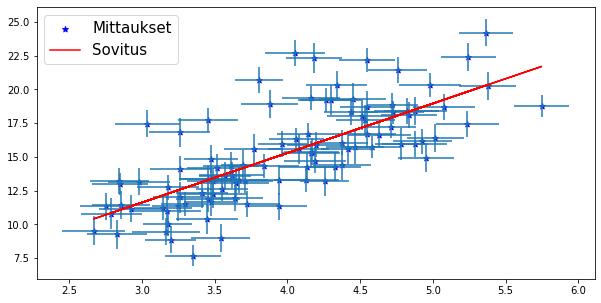

In [2]:
def randomizer(a):
    b = a.copy()
    for i in range(0,len(b)):
        b[i] = b[i]*rand.normalvariate(1, 0.1)
    return b;

# Create data points that vary according to normal distribution.

val1 = randomizer(np.linspace(3,5,100))
val2 = randomizer(np.linspace(10,20,100))

# Give each data point an error that is normally distributed.

err1 = (1/5)*randomizer(np.ones(len(val1)))
err2 = randomizer(np.ones(len(val2)))

fig = plt.figure(figsize=(10,5))
plt.scatter(val1, val2, marker ='*', color = 'b', label = 'Measurements')
plt.errorbar(val1, val2, xerr = err1, yerr = err2, fmt = 'none')

# Let's calculate a linear fit with the sum of least squares.

slope, intercept, r_value, p_value, std_err = stats.linregress(val1, val2)
plt.plot(val1, intercept + slope*val1, 'r', label='Fit')

plt.legend(fontsize = 15)
plt.show()

# If we want to know the mathematical properties of the linear fit, we could for example write print(slope) etc.

<a id="animations"></a>
### 7. Animations

Python has multiple ways of making animations. However, we don't recommend using the plotly-library with Notebooks, since it is so slow. The following example shows clearly why more data gives better results.

In [3]:
# Import the data we want to use
data = pd.read_csv('http://opendata.cern.ch/record/545/files/Dimuon_DoubleMu.csv')

# Save the invariant mass into a variable
iMass = data.M

In [4]:
# Define a function that produces our figure. 
# Num says how many steps we have taken and the function draws a new histogram for each step.

def updt_hist(num, iMass):
    plt.cla()
    axes = plt.gca()
    axes.set_ylim(0,8000)
    axes.set_xlim(0,200)
    plt.hist(iMass[:num*480], bins = 120)

Note that cells that contain animations are _**slow**_. The more images, the slower it is to make them. This can take several minutes.

Huom: animaatioita sisältävät solut ovat _**hitaita**_. Mitä enemmän kuvia, sitä hitaampaa niiden tekeminen on. Tämä voi viedä useita minuutteja.

In [5]:
# Import a library that produces animations.
import matplotlib.animation

In [9]:
%%capture

# The purpose of the %%capture -magic function is to prevent this cell from displaying a finished image, 
# so that there won't be empty images or other unnecessary things. It makes our life easier.

fig = plt.figure()

# fargs says which variables a function takes as input and the empty part tells to the prorgram that it must use two variables.
# The other variable is the current frame.

anim = matplotlib.animation.FuncAnimation(fig, updt_hist, frames = 200, fargs=(iMass, ) )

# anim.to_jshtml() changes the animation to (javascript)html so that Notebook can show it.

from IPython.display import HTML
HTML(anim.to_jshtml())

In [10]:
# Tämän ajamalla animaatio saadaan sitten näkyväksi, kun se on ohjelman muistissa.
# Running this cell the animation can be shown, when it is in the memory of the program.

HTML(anim.to_jshtml())

<a id="maps"></a>
### 8. Maps and heat maps

Let's now take a look at interactive maps that utilize data! Making them is easier than you would think. In the following example we use data that contains latitudes and longitudes.

In [15]:
# We can find different maps from the folium-library.

import folium

# Tiheyttä värein edustava heatmap-systeemi on myös näppärä, joten otetaan se käyttöön.
# Let's import the HeatMap-system. It is represents density as colours, which is useful for our purposes.

from folium.plugins import HeatMap

ModuleNotFoundError: No module named 'folium'

In [13]:
# This dataset contains information about earthquakes all around the world that happened in the last month. 
# It is updated continually.

quakeData = pd.read_csv('https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv')
quakeData.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2022-08-09T12:56:06.552Z,38.583800,-119.477900,10.100000,0.70,ml,8.0,115.03,0.03300,0.1087,...,2022-08-09T13:00:23.453Z,"3 km NE of Coleville, California",earthquake,NaN,2.20,0.40,4.0,automatic,nn,nn
1,2022-08-09T12:47:29.075Z,38.591100,-119.429100,4.500000,1.10,ml,12.0,106.93,0.07100,0.1224,...,2022-08-09T12:52:14.458Z,"7 km ENE of Coleville, California",earthquake,NaN,0.70,0.19,7.0,automatic,nn,nn
2,2022-08-09T12:40:49.360Z,19.157499,-155.495834,34.330002,1.80,md,31.0,130.00,NaN,0.1400,...,2022-08-09T12:43:55.170Z,"5 km SSW of Pāhala, Hawaii",earthquake,0.69,0.93,0.83,7.0,automatic,hv,hv
3,2022-08-09T12:32:35.597Z,38.587000,-119.422900,1.800000,1.10,ml,12.0,80.98,0.07600,0.1567,...,2022-08-09T12:36:24.062Z,"7 km ENE of Coleville, California",earthquake,NaN,14.40,0.13,7.0,automatic,nn,nn
4,2022-08-09T12:23:40.320Z,38.831165,-122.806335,1.570000,0.63,md,18.0,44.00,0.00829,0.0100,...,2022-08-09T12:40:13.785Z,"7km W of Cobb, CA",earthquake,0.24,0.56,0.06,3.0,automatic,nc,nc


In [ ]:
# Since our data is in DataFrame-form, we change it first into lists that HeatMap understands.

dat = [0]*len(quakeData)

# The list contains values (tuples), that contain latitude, longitude and the strength of the earthquake.
# Magnitude isn't strictly necessary for our purposes, but it can become useful for example if we want to study 
# only the instances that cross a certain threshold.

for i in range(0, len(quakeData)):
    dat[i] = [quakeData['latitude'][i], quakeData['longitude'][i], quakeData['mag'][i]]

In [ ]:
# In case that there are also rows whose magnitude is unknown (indicated as NaN),
# let's remove them so that our list doesn't start behaving awkwardly.

dat = [x for x in dat if ~np.isnan(x[2])]

In [14]:
# Different types of maps: https://deparkes.co.uk/2016/06/10/folium-map-tiles/
# 'world_copy_jump = True' enables rolling the map to the side so that the earthquakes are still shown.
# If you only want one map projection, please add the argument 'no_wrap = True' to the list of arguments.
# The argument control_scale adds a scale to the map.

m = folium.Map([15., -75.], tiles='openstreetmap', zoom_start=3, world_copy_jump = True, control_scale = True)

HeatMap(dat, radius = 15).add_to(m)

m

NameError: name 'folium' is not defined

<a id="problems"></a>
### 9. Common problems

List of some common problems:
  
Solu jäi jumiin eikä piirrä kuvaajaani tai aja koodiani?  
Virheilmoitus herjaa 'nimi is not defined' tai 'nimi does not exist'?  
Yritän tallentaa muuttujaan asioita, mutta print(nimi) kertookin None?  
Datani ei suostu lataamaan?  
Lataamassani datassa on jotain omituisia 'NaN'-arvoja?  
Yhdistin palasia datasta, mutta nyt en enää pysty tekemään asioita uudella muuttujallani?  
Koodini ei toimi, vaikka se on ihan varmasti oikein kirjoitettu?  
Datan päivämäärät sekoittavat toiminnan, miten korjaan?  
Kopioin datan uuteen muuttujaan, jonka käsittelyn jälkeen huomaan alkuperäisen muuttujan arvojen vaihtuneen?  


#### Yhyy, en osaa?

Nou hätä, kukaan ei aloita mestarina. Tekemällä oppii ja virheet kuuluvat asiaan.

Pythonissa on kivana puolena sen laaja käyttäjäkunta: mitä ikinä keksitkään kysyä, et ole ensimmäinen ja vastaus luultavasti löytyy ensimmäisten googlaustulosten joukosta. Tässä on ohjeita muutamiin yleisimpiin ongelmatilanteisiin.

#### A cell got stuck and it won't draw my figure or run my code.

If it takes more time than it should to run a cell, and the code isn't doing anything computing-intensive, then it is possible that there is an infinite loop in the code. Stop the execution of the kernel and make sure your code doesn't have infinite loops. If you don't find the problem, make the syntax simpler so that you can be sure that the code is logical.

A common problem is that a syntax error drives the machine to do something wrong. An example: you're making a histogram of a column of a big data set but you forget to add the name of the column into your code. Now the machine tries to execute your command and gets confused about a table that contains the whole data. Stop the kernel and change the names of the variables.

#### An error message says 'name is not defined' or 'name does not exist'.

The variable you're alluding to doesn't exist. Are you sure you have run the cell where the variable is defined in this session? Also, remember that the size of the letters matters.

#### I'm trying to save something in a variable but print(name) outputs None.

You probably haven't saved the value properly into the variable. Remember to save all the operations you have made into a variable, e.g.

```python
variable = ... imported data
variable = variable*2
```
and not
```python
variable = ... imported data
variable*2
```

If print(variable) returns None, the variable is empty. Make sure that the operation you want to do is possible and doesn't fall apart because of e.g. invalid inputs for an inner function.

#### I can't load my data into a variable?

Ordinary csv-files and similar files can be viewed with text editors. There you can see which character separates the values, which row the relevant data starts from, and is does the file contain the data you need.

Separator characters, headers, and others can be defined as parameters of the read-function, e.g.

```python
pd.read_csv('link to a file', sep = ';')
```
reads a csv-file whose values are separated by a semicolon. More about this in the section 3.

**pd.read_table()** can help to clarify the data if you don't want to open a text editor.

Sometimes there are incompabilities with the codes that guide the character encoding. This is when the parameter **encoding** can be of help. More information about them can be found [here](https://docs.python.org/3/library/codecs.html#standard-encodings). If the default option doesn't work, try some variant of ISO; it should work in most cases.

#### Why does my dataset have 'NaN'-values?

NaN, 'Not a Number', says that there is no value in this part of the data set. Either the value is weird (such as the square root of a negative number), or it just doesn't exist.

Many functions doen't care about NaN-values or you can add a parameter that lets the function to ignore them. This helps especially when you have big datasets, since the program won't stall when it has to compute something incalculable.

####  I combined pieces of data into a variable, but I can't use it.

Did you combine different types of variables? The computer handles integers, floating point numbers, strings, and other value types differently. Sometimes a series of numbers is written as a string into a dataset, which causes all kind of trouble. Python has different commands for checking the type of a variable, such as isstring.

Did you combine the pieces correctly? If you wanted columns next to each other, make sure you didn't combine them into a single long column. Analyzing the data with e.g. commands **len(name)** and **name.head()** is often useful in these situations.

#### Why doesn't my code work although I know it's written correctly?

Go over your code and check that there isn't a dot in a wrong place or a wrong size letter somewhere.

If you're sure the code is supposed to work but it doesn't, the problem may be caused by old values in the kernel's memory. Try clicking on 'Restart & Clear Output' from the Kernel-menu, possibly even couple times.

####  The dates in the data mess up the program. How do I fix this?

Dates can be expressed in many forms in the data. If the default settings don't work, you can find different parameters that affect the interpretation of dates in the [documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) of **pd.read_csv()**. For example. **dayfirst** or **date_parser** may solve the problem. Python has also the [**time**](https://docs.python.org/3/library/time.html)-library that can be of help.

#### I copied the data into a new variable. After I have processed it, I see that the values of the original variable have changed.

Python operates by pointers. This means that a variable contains a pointer to a memory slot where the information is located, rather than containing the information itself. When copying a full data variable to a new variable rather than single rows or columns, it may happen that the new variable just points to the old information. If the content of the new variable is changed, the changes are made to the old variable as well. Because of this, it is useful to copy the original variable as follows:
```python
newName = oldName.copy()
```
Now the program uses a new memory slot so that the new variable doesn't point to the old one. The problem seems to happen only when saving the whole data into a new variable, which means that isolating single rows or columns into variables happens without referencing the original data.